<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/stats/Fampita_mdg_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pingouin

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time
import pingouin 

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

#from pingouin import corr
import pandas.util.testing as tm

cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")

ke_datafar = pd.read_csv("/content/drive/My Drive/data/Kenyans data.csv")

mdg_databe = pd.read_csv("/content/drive/My Drive/data/databe mdg.csv")


cco_cases_mdg.set_index('Date', inplace=True)

tilyvoa.set_index('Daty', inplace=True)



path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [0]:
mdg_databe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Loharano  218 non-null    object 
 1   Lnav      118 non-null    object 
 2   Taona     115 non-null    float64
 3   Daty      218 non-null    object 
 4   Toerana   47 non-null     object 
 5   Distrika  73 non-null     object 
 6   Faritra   171 non-null    object 
 7   Avaiza    44 non-null     object 
 8   Fiaviana  37 non-null     object 
 9   Ivao      157 non-null    float64
dtypes: float64(2), object(8)
memory usage: 17.2+ KB


In [0]:
databefar = mdg_databe.groupby('Faritra')
for Faritra in databefar:
    print(Faritra)

('Antananarivo',     Loharano  Lnav  Taona        Daty  ...       Faritra Avaiza Fiaviana Ivao
1     FB-TVM   NaN    NaN  2020-05-08  ...  Antananarivo    NaN      NaN  NaN
13    FB-TVM  vavy   24.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
14    FB-TVM  vavy   63.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
15    FB-TVM  lahy   25.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
16    FB-TVM  vavy   30.0  2020-05-07  ...  Antananarivo    NaN      NaN  NaN
..       ...   ...    ...         ...  ...           ...    ...      ...  ...
200   FB-TVM   NaN    NaN  2020-03-29  ...  Antananarivo    NaN      NaN  NaN
202   FB-TVM   NaN    NaN  2020-03-28  ...  Antananarivo    NaN      NaN  NaN
207   FB-TVM   NaN    NaN  2020-03-27  ...  Antananarivo    NaN      NaN  NaN
213   FB-TVM   NaN    NaN  2020-03-26  ...  Antananarivo    NaN      NaN  NaN
216   FB-TVM   NaN    NaN  2020-03-25  ...  Antananarivo    NaN      NaN  NaN

[88 rows x 10 columns])
('Mahatsiatra Ambony',

In [0]:
Antanabe = databefar.get_group('Antananarivo')
Toamabe = databefar.get_group('Toamasina')

Antanabe
#type(Antanab)
# Antana eto dia fitambarana (key= Faritra iray,object=data momba ilay Faritra)
# Antanadaty = Antana.groupby('Daty')
# Antanadaty dia 
#plt.figure()
#plt.plot(Antana['Daty'], Antana['Ivao'], marker ="+",ls = 'None', color='black')

,Loharano,Lnav,Taona,Daty,Toerana,Distrika,Faritra,Avaiza,Fiaviana,Ivao
1,FB-TVM,NaN,NaN,2020-05-08,NaN,NaN,Antananarivo,NaN,NaN,NaN
13,FB-TVM,vavy,24.0,2020-05-07,Amboditsiry,Tana t,Antananarivo,NaN,NaN,NaN
14,FB-TVM,vavy,63.0,2020-05-07,Ambohimanarina,Tana t,Antananarivo,NaN,NaN,NaN
15,FB-TVM,lahy,25.0,2020-05-07,Anosizato,Tana t,Antananarivo,NaN,NaN,NaN
16,FB-TVM,vavy,30.0,2020-05-07,Ambolokandrina,Tana t,Antananarivo,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
200,FB-TVM,NaN,NaN,2020-03-29,NaN,NaN,Antananarivo,NaN,NaN,NaN
202,FB-TVM,NaN,NaN,2020-03-28,NaN,NaN,Antananarivo,NaN,NaN,NaN
207,FB-TVM,NaN,NaN,2020-03-27,NaN,NaN,Antananarivo,NaN,NaN,NaN
213,FB-TVM,NaN,NaN,2020-03-26,NaN,NaN,Antananarivo,NaN,NaN,NaN


In [0]:
mdgfardat = mdg_databe.groupby(['Faritra', 'Daty'])
# mdgfardat fotsiny dia manome type(mdgfardat)
mdgfd = mdgfardat.sum(min_count=1)
mdgfd

Taona  Ivao
Faritra      Daty                        
Antananarivo 2020-03-25         NaN   NaN
             2020-03-26         NaN   NaN
             2020-03-27         NaN   NaN
             2020-03-28         NaN   NaN
             2020-03-29         NaN   NaN
...                             ...   ...
Toamasina    2020-05-05         NaN   0.0
             2020-05-06   21.666667   6.0
             2020-05-07  471.000000   NaN
             2020-05-08         NaN   NaN
Toliara      2020-04-06  107.000000   2.0

[92 rows x 2 columns]

In [0]:
AntanaIvao = mdgfd.loc['Antananarivo','Ivao']

AntanaIvao_lst = list(AntanaIvao)

print(AntanaIvao)
print(AntanaIvao_lst)
print(len(AntanaIvao_lst))
#type(AntanaIvao) raha ilaina

# lay min_count = 1 no mikajy ny sum(nan) = nan.
# databefardat.get_group('Antananarivo') tsy mety
#raha g = mdgfardat.apply(lambda er: er.sum(min_count=1) ) 
# dia tsy mety g.loc['Antananarivo','Ivao']
#g.loc['Antananarivo', 'Ivao'] tsy mety


Daty
2020-03-25    NaN
2020-03-26    NaN
2020-03-27    NaN
2020-03-28    NaN
2020-03-29    NaN
2020-03-30    0.0
2020-03-31    1.0
2020-04-01    NaN
2020-04-02    NaN
2020-04-03    NaN
2020-04-04    0.0
2020-04-05    NaN
2020-04-06    4.0
2020-04-07    3.0
2020-04-08    NaN
2020-04-09    0.0
2020-04-10    3.0
2020-04-11    0.0
2020-04-12    1.0
2020-04-13    0.0
2020-04-14    2.0
2020-04-15    NaN
2020-04-16    0.0
2020-04-17    3.0
2020-04-18    2.0
2020-04-19    1.0
2020-04-20    0.0
2020-04-21    0.0
2020-04-22    0.0
2020-04-23    0.0
2020-04-24    NaN
2020-04-25    0.0
2020-04-26    0.0
2020-04-27    3.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    0.0
2020-05-01    4.0
2020-05-02    0.0
2020-05-03    7.0
2020-05-04    0.0
2020-05-05    0.0
2020-05-06    1.0
2020-05-07    NaN
2020-05-08    NaN
Name: Ivao, dtype: float64
[nan, nan, nan, nan, nan, 0.0, 1.0, nan, nan, nan, 0.0, nan, 4.0, 3.0, nan, 0.0, 3.0, 0.0, 1.0, 0.0, 2.0, nan, 0.0, 3.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, nan, 0.

In [0]:
ke_datafar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Monitored/close contacts          12 non-null     object 
 1   Discharged after being monitored  9 non-null      float64
 2   Followed up                       7 non-null      float64
 3   Daty                              230 non-null    object 
 4   Faritra                           224 non-null    object 
 5   Tilytot                           11 non-null     float64
 6   Tilyvao                           14 non-null     float64
 7   Itot                              79 non-null     float64
 8   Ivao                              141 non-null    float64
 9   Rtot                              11 non-null     float64
 10  Rvao                              18 non-null     float64
 11  Matot                             10 non-null     float64
 12  Matvao  

In [0]:
datacounty = ke_datafar.groupby('Faritra')

Nairobe = datacounty.get_group('Nairobi')
Mombasabe = datacounty.get_group('Mombasa')
Nairobe

,Monitored/close contacts,Discharged after being monitored,Followed up,Daty,Faritra,Tilytot,Tilyvao,Itot,Ivao,Rtot,Rvao,Matot,Matvao
14,NaN,NaN,NaN,2020-03-25,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,2020-03-26,Nairobi,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,2020-03-27,Nairobi,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,2020-03-28,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,2020-03-29,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,2020-03-30,Nairobi,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,2020-03-31,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,2020-04-01,Nairobi,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,2020-04-02,Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,2020-04-03,Nairobi,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN


In [0]:
kefardat = ke_datafar.groupby(['Faritra', 'Daty'])

kefd = kefardat.sum(min_count=1)

NairoIvao = kefd.loc['Nairobi','Ivao']

NairoIvao_lst = list(NairoIvao)

print(NairoIvao)
print(NairoIvao_lst)
print(len(NairoIvao_lst))

Daty
2020-03-25     NaN
2020-03-26     1.0
2020-03-27     NaN
2020-03-28     NaN
2020-03-29     NaN
2020-03-30     NaN
2020-03-31     NaN
2020-04-01     1.0
2020-04-02     NaN
2020-04-03     7.0
2020-04-04     NaN
2020-04-05     NaN
2020-04-06     NaN
2020-04-07     7.0
2020-04-08     NaN
2020-04-09     3.0
2020-04-10     NaN
2020-04-11     1.0
2020-04-12     4.0
2020-04-13     3.0
2020-04-14     6.0
2020-04-15     5.0
2020-04-16     NaN
2020-04-17     NaN
2020-04-18     NaN
2020-04-19     3.0
2020-04-20     4.0
2020-04-21     6.0
2020-04-22     4.0
2020-04-23    12.0
2020-04-24    11.0
2020-04-25     NaN
2020-04-26     8.0
2020-04-27     4.0
2020-04-28     7.0
2020-04-29     1.0
2020-04-30     3.0
2020-05-01     NaN
2020-05-02     NaN
2020-05-03     8.0
2020-05-04    15.0
2020-05-05    29.0
2020-05-06     NaN
2020-05-07    17.0
2020-05-08     NaN
Name: Ivao, dtype: float64
[nan, 1.0, nan, nan, nan, nan, nan, 1.0, nan, 7.0, nan, nan, nan, 7.0, nan, 3.0, nan, 1.0, 4.0, 3.0, 6.0, 5.0, na

In [0]:
type(AntanaIvao)

pandas.core.series.Series

In [0]:
AntanaIvao.index = pd.to_datetime(AntanaIvao.index)
NairoIvao.index = pd.to_datetime(NairoIvao.index)

In [0]:
daty_lav = datetime.date(2020,3,24)

daty_lst = []


for el in range(len(AntanaIvao_lst)):
  daty_lav =  daty_lav + datetime.timedelta(days = 1)
  daty_lst.append(daty_lav)

len(daty_lst)

In [0]:
dfmdgke = pd.DataFrame({'Datyx': daty_lst, 'Mdg': AntanaIvao_lst, 'Ke': NairoIvao_lst})



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


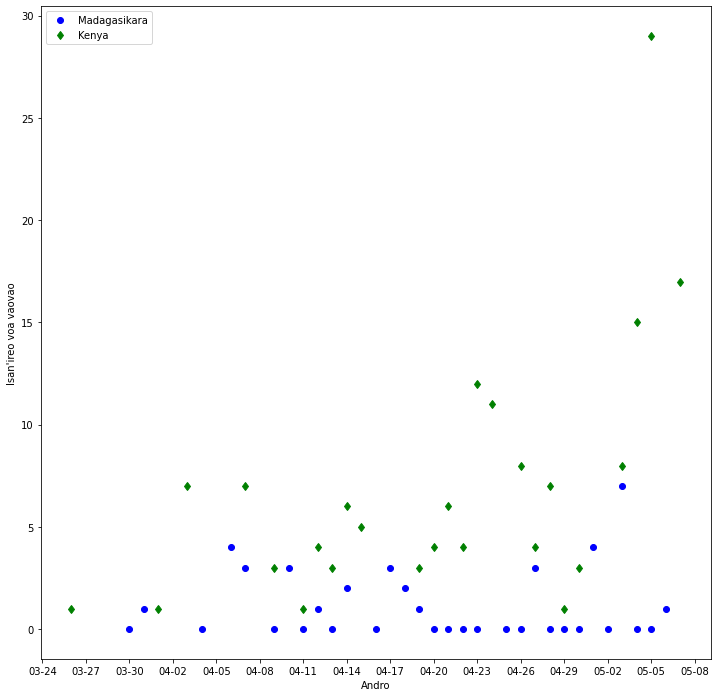

In [0]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(AntanaIvao.index.values, AntanaIvao, marker ="o", ls = 'None', color='blue',label="Madagasikara")
ax.plot(NairoIvao.index.values, NairoIvao, marker = "d", ls = 'None', color='green', label='Kenya')
ax.set(xlabel ='Andro', ylabel = "Isan'ireo voa vaovao")

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgkeIvao.eps')

plt.show()

In [0]:
plt.figure(figsize=(12,5))
plt.xlabel('Daty')

dfmdgke.Mdg.plot(daty_lst, color='blue', marker ="+",ls = 'None', grid=True, label='Ivao(MDG)')
dfmdgke.Ke.plot(color='green',  marker ="3",ls = 'None', label='Ivao(KE)')

plt.legend(loc= 'best')
plt.show()

